In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
import os, sys

In [3]:
sys.path.append('..')

In [4]:
from ers.base import ERS
from ers.models import StoVol

In [5]:
T = 25
alpha=0.95
beta=0.7
sv=0.3
d=1

stovol = StoVol(dimension=d, alpha=alpha, beta=beta, sv=sv)

In [6]:
xtrue=np.zeros((T, d));
xtrue[0,:]=stovol.ss*np.random.randn(d)

y=np.zeros((T, d))
y[0]=beta*np.exp(xtrue[0,0]/2)*np.random.randn(d);
for t in np.arange(1,T):
    xtrue[t]=alpha*xtrue[t-1]+sv*np.random.randn(d)
    y[t]=beta*np.exp(xtrue[t]/2)*np.random.randn(d)

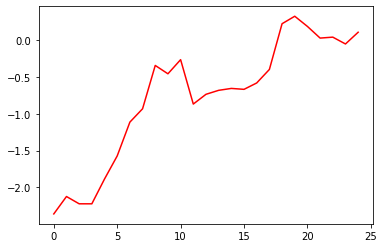

In [7]:
plt.plot(xtrue, color = 'red')

In [8]:
n_samples = 2
accepted_x, cand_x, n_trial = stovol.sample_n(n_samples=n_samples, n_particles=2500, T=T, y=y)

 50%|█████     | 1/2 [00:14<00:14, 14.83s/it]

0


100%|██████████| 2/2 [00:36<00:00, 18.36s/it]

1


In [9]:
n_samples/ n_trial

0.4

In [10]:
average_x = np.mean(accepted_x, axis=0)

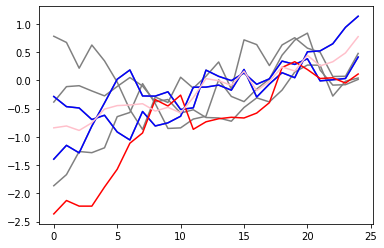

In [11]:
for i in range(cand_x.shape[0]):
    plt.plot(cand_x[i,:,0], color = 'gray')
    
for i in range(accepted_x.shape[0]):
    plt.plot(accepted_x[i,:,0], color = 'blue')

plt.plot(xtrue, color = 'red')
plt.plot(average_x, color = 'pink')

In [12]:
 from pathos.multiprocessing import ProcessingPool as Pool

In [20]:

import time

In [14]:
start = time.time()
num_workers = 3
n_samples = 100
n_particles = 2000
f = lambda x : stovol.sample_n(n_samples=n_samples, n_particles=n_particles, T=T, y=y)
with Pool(num_workers) as p:
        out = p.map(f, range(num_workers))
time.time()-start

  0%|          | 0/100 [00:00<?, ?it/s]

0


  1%|          | 1/100 [00:23<39:22, 23.86s/it]

0


  1%|          | 1/100 [00:24<40:10, 24.35s/it]

0


  1%|          | 1/100 [00:24<40:46, 24.71s/it]

1


  2%|▏         | 2/100 [00:35<32:56, 20.17s/it]

1


  2%|▏         | 2/100 [00:35<33:27, 20.49s/it]

1


  2%|▏         | 2/100 [00:36<34:06, 20.88s/it]

2


  3%|▎         | 3/100 [00:47<28:29, 17.63s/it]

2


  3%|▎         | 3/100 [00:47<28:59, 17.93s/it]

2


  3%|▎         | 3/100 [00:48<29:30, 18.25s/it]

3


  4%|▍         | 4/100 [01:23<37:18, 23.31s/it]

3


  4%|▍         | 4/100 [01:24<37:39, 23.54s/it]

3


  4%|▍         | 4/100 [01:25<38:15, 23.91s/it]

4


  5%|▌         | 5/100 [02:00<43:22, 27.40s/it]

4


  5%|▌         | 5/100 [02:00<43:22, 27.40s/it]

4


  5%|▌         | 5/100 [02:02<43:50, 27.69s/it]

5


  6%|▌         | 6/100 [02:24<41:12, 26.30s/it]

5


  6%|▌         | 6/100 [02:25<41:31, 26.51s/it]

5


  6%|▌         | 6/100 [02:25<41:14, 26.33s/it]

6


  7%|▋         | 7/100 [02:36<34:14, 22.09s/it]

6


  7%|▋         | 7/100 [02:36<33:47, 21.81s/it]

6


  7%|▋         | 7/100 [02:37<34:26, 22.22s/it]

7


  8%|▊         | 8/100 [03:00<34:30, 22.51s/it]

77


  8%|▊         | 8/100 [03:01<35:00, 22.83s/it]

  8%|▊         | 8/100 [03:01<35:15, 23.00s/it]

8


  9%|▉         | 9/100 [03:49<46:09, 30.43s/it]

8


  9%|▉         | 9/100 [03:49<46:11, 30.46s/it]

8


  9%|▉         | 9/100 [03:50<46:42, 30.80s/it]

9


 10%|█         | 10/100 [04:01<37:07, 24.75s/it]

9


 10%|█         | 10/100 [04:02<37:34, 25.05s/it]

9


 10%|█         | 10/100 [04:03<38:04, 25.38s/it]

10


 11%|█         | 11/100 [05:27<1:04:03, 43.19s/it]

10


 11%|█         | 11/100 [05:28<1:04:19, 43.36s/it]

10


 11%|█         | 11/100 [05:28<1:04:14, 43.31s/it]

11


 12%|█▏        | 12/100 [05:51<54:51, 37.40s/it]  

11


 12%|█▏        | 12/100 [05:52<54:54, 37.43s/it]  

11


 12%|█▏        | 12/100 [05:52<54:58, 37.48s/it]  

12


 13%|█▎        | 13/100 [07:40<1:25:01, 58.64s/it]

12


 13%|█▎        | 13/100 [07:41<1:25:46, 59.16s/it]

12


 13%|█▎        | 13/100 [07:42<1:26:12, 59.46s/it]

13


 14%|█▍        | 14/100 [07:52<1:04:11, 44.78s/it]

13


 14%|█▍        | 14/100 [07:53<1:04:22, 44.92s/it]

13


 14%|█▍        | 14/100 [07:54<1:04:46, 45.20s/it]

14


 15%|█▌        | 15/100 [08:05<49:41, 35.08s/it]  

14


 15%|█▌        | 15/100 [08:05<49:45, 35.12s/it]  

14


 15%|█▌        | 15/100 [08:07<50:15, 35.48s/it]  

15


 16%|█▌        | 16/100 [08:40<49:06, 35.08s/it]

15


 16%|█▌        | 16/100 [08:43<50:12, 35.86s/it]

15


 16%|█▌        | 16/100 [08:43<50:03, 35.75s/it]

16


 17%|█▋        | 17/100 [09:15<48:37, 35.15s/it]

16


 17%|█▋        | 17/100 [09:17<48:57, 35.39s/it]

16


 17%|█▋        | 17/100 [09:22<50:43, 36.67s/it]

17


 18%|█▊        | 18/100 [09:39<43:17, 31.68s/it]

17


 18%|█▊        | 18/100 [09:41<43:52, 32.11s/it]

17


 18%|█▊        | 18/100 [09:46<45:01, 32.94s/it]

18


 19%|█▉        | 19/100 [10:04<40:01, 29.65s/it]

18


 19%|█▉        | 19/100 [10:06<40:13, 29.79s/it]

18


 19%|█▉        | 19/100 [10:10<40:49, 30.24s/it]

19


 20%|██        | 20/100 [11:17<56:57, 42.72s/it]

19


 20%|██        | 20/100 [11:21<57:44, 43.31s/it]

19


 20%|██        | 20/100 [11:24<57:42, 43.29s/it]

20


 21%|██        | 21/100 [11:42<49:10, 37.35s/it]

20


 21%|██        | 21/100 [11:47<50:10, 38.11s/it]

20


 21%|██        | 21/100 [11:48<49:21, 37.49s/it]

21


 22%|██▏       | 22/100 [12:05<43:11, 33.22s/it]

21


 22%|██▏       | 22/100 [12:11<44:19, 34.10s/it]

21


 22%|██▏       | 22/100 [12:12<43:21, 33.35s/it]

22


 23%|██▎       | 23/100 [14:18<1:20:44, 62.92s/it]

22


 23%|██▎       | 23/100 [14:26<1:21:48, 63.75s/it]

22


 23%|██▎       | 23/100 [14:28<1:23:12, 64.84s/it]

23


 24%|██▍       | 24/100 [14:30<1:00:36, 47.85s/it]

23


 24%|██▍       | 24/100 [14:38<1:00:56, 48.11s/it]

23


 24%|██▍       | 24/100 [14:40<1:02:14, 49.13s/it]

24


 25%|██▌       | 25/100 [15:32<1:05:00, 52.00s/it]

24


 25%|██▌       | 25/100 [15:39<1:04:49, 51.86s/it]

24


 25%|██▌       | 25/100 [15:41<1:05:41, 52.56s/it]

25


 26%|██▌       | 26/100 [15:44<49:19, 40.00s/it]  

25


 26%|██▌       | 26/100 [15:51<49:19, 39.99s/it]  

25


 26%|██▌       | 26/100 [15:53<49:46, 40.35s/it]  

26


 27%|██▋       | 27/100 [16:34<52:17, 42.98s/it]

26


 27%|██▋       | 27/100 [16:39<51:44, 42.52s/it]

26


 27%|██▋       | 27/100 [16:40<51:42, 42.50s/it]

27


 28%|██▊       | 28/100 [17:25<54:28, 45.39s/it]

27


 28%|██▊       | 28/100 [17:27<52:48, 44.01s/it]

27


 28%|██▊       | 28/100 [17:28<52:52, 44.06s/it]

28


 29%|██▉       | 29/100 [17:37<41:48, 35.33s/it]

28


 29%|██▉       | 29/100 [17:39<40:53, 34.56s/it]

28


 29%|██▉       | 29/100 [17:41<41:12, 34.82s/it]

29


 30%|███       | 30/100 [18:02<37:37, 32.25s/it]

29


 30%|███       | 30/100 [18:04<36:58, 31.69s/it]

29


 30%|███       | 30/100 [18:06<37:01, 31.73s/it]

30


 31%|███       | 31/100 [18:15<30:22, 26.41s/it]

30


 31%|███       | 31/100 [18:17<29:57, 26.04s/it]

30


 31%|███       | 31/100 [18:17<29:32, 25.68s/it]

31


 32%|███▏      | 32/100 [19:52<53:54, 47.56s/it]

31


 32%|███▏      | 32/100 [19:52<53:03, 46.82s/it]

31


 32%|███▏      | 32/100 [19:57<54:03, 47.70s/it]

32


 33%|███▎      | 33/100 [20:04<41:11, 36.89s/it]

32


 33%|███▎      | 33/100 [20:05<40:58, 36.69s/it]

32


 33%|███▎      | 33/100 [20:08<41:01, 36.73s/it]

33


 34%|███▍      | 34/100 [21:39<1:00:01, 54.57s/it]

33


 34%|███▍      | 34/100 [21:43<1:00:21, 54.87s/it]

33


 34%|███▍      | 34/100 [21:49<1:01:34, 55.98s/it]

34


 35%|███▌      | 35/100 [21:52<45:23, 41.90s/it]  

34


 35%|███▌      | 35/100 [21:55<45:44, 42.23s/it]  

34


 35%|███▌      | 35/100 [22:01<46:30, 42.93s/it]  

35


 36%|███▌      | 36/100 [22:30<43:27, 40.74s/it]

35


 36%|███▌      | 36/100 [22:33<43:25, 40.71s/it]

35


 36%|███▌      | 36/100 [22:37<43:30, 40.78s/it]

36


 37%|███▋      | 37/100 [23:45<53:30, 50.96s/it]

36


 37%|███▋      | 37/100 [23:48<53:38, 51.09s/it]

36


 37%|███▋      | 37/100 [23:49<52:52, 50.35s/it]

37


 38%|███▊      | 38/100 [23:57<40:47, 39.47s/it]

37


 38%|███▊      | 38/100 [24:00<40:45, 39.45s/it]

37


 38%|███▊      | 38/100 [24:02<40:20, 39.04s/it]

38


 39%|███▉      | 39/100 [25:23<54:20, 53.45s/it]

38


 39%|███▉      | 39/100 [25:28<53:55, 53.04s/it]

38


 39%|███▉      | 39/100 [25:29<55:15, 54.35s/it]

39


 40%|████      | 40/100 [26:12<51:58, 51.97s/it]

39


 40%|████      | 40/100 [26:16<52:09, 52.16s/it]

39


 40%|████      | 40/100 [26:18<52:11, 52.19s/it]

40


 41%|████      | 41/100 [26:24<39:21, 40.03s/it]

40


 41%|████      | 41/100 [26:29<39:34, 40.24s/it]

40


 41%|████      | 41/100 [26:31<39:40, 40.35s/it]

41


 42%|████▏     | 42/100 [26:48<34:07, 35.30s/it]

41


 42%|████▏     | 42/100 [26:54<34:31, 35.71s/it]

41


 42%|████▏     | 42/100 [26:55<34:11, 35.36s/it]

42


 43%|████▎     | 43/100 [27:00<26:56, 28.36s/it]

42


 43%|████▎     | 43/100 [27:06<27:09, 28.60s/it]

42


 43%|████▎     | 43/100 [27:07<27:13, 28.65s/it]

43


 44%|████▍     | 44/100 [28:14<39:12, 42.00s/it]

43


 44%|████▍     | 44/100 [28:20<39:19, 42.13s/it]

43


 44%|████▍     | 44/100 [28:20<39:02, 41.83s/it]

44


 45%|████▌     | 45/100 [28:26<30:04, 32.81s/it]

44


 45%|████▌     | 45/100 [28:31<30:08, 32.88s/it]

44


 45%|████▌     | 45/100 [28:33<30:25, 33.18s/it]

45


 46%|████▌     | 46/100 [28:50<27:13, 30.25s/it]

45


 46%|████▌     | 46/100 [28:53<26:43, 29.69s/it]

45


 46%|████▌     | 46/100 [28:56<26:57, 29.96s/it]

46


 47%|████▋     | 47/100 [28:58<20:46, 23.51s/it]

46


 47%|████▋     | 47/100 [29:00<20:07, 22.78s/it]

46


 47%|████▋     | 47/100 [29:03<20:33, 23.28s/it]

47


 48%|████▊     | 48/100 [29:06<16:19, 18.84s/it]

47


 48%|████▊     | 48/100 [29:08<15:47, 18.23s/it]

47


 48%|████▊     | 48/100 [29:10<15:52, 18.31s/it]

48


 49%|████▉     | 49/100 [29:20<14:56, 17.57s/it]

48


 49%|████▉     | 49/100 [29:23<14:19, 16.84s/it]

48


 49%|████▉     | 49/100 [29:24<15:03, 17.71s/it]

49


 50%|█████     | 50/100 [29:48<17:11, 20.62s/it]

49


 50%|█████     | 50/100 [29:52<16:56, 20.33s/it]

49


 50%|█████     | 50/100 [29:53<17:38, 21.18s/it]

50


 51%|█████     | 51/100 [29:56<13:44, 16.82s/it]

50


 51%|█████     | 51/100 [29:58<13:11, 16.16s/it]

50


 51%|█████     | 51/100 [30:00<13:46, 16.86s/it]

51


 52%|█████▏    | 52/100 [30:53<23:12, 29.00s/it]

51


 52%|█████▏    | 52/100 [30:56<22:52, 28.60s/it]

51


 52%|█████▏    | 52/100 [30:56<22:54, 28.64s/it]

52


 53%|█████▎    | 53/100 [31:02<17:53, 22.84s/it]

52


 53%|█████▎    | 53/100 [31:03<17:15, 22.03s/it]

52


 53%|█████▎    | 53/100 [31:04<17:30, 22.36s/it]

53


 54%|█████▍    | 54/100 [31:09<13:53, 18.11s/it]

53


 54%|█████▍    | 54/100 [31:10<13:32, 17.67s/it]

53


 54%|█████▍    | 54/100 [31:10<13:27, 17.55s/it]

54


 55%|█████▌    | 55/100 [31:16<11:09, 14.87s/it]

54


 55%|█████▌    | 55/100 [31:17<10:54, 14.55s/it]

54


 55%|█████▌    | 55/100 [31:18<10:56, 14.58s/it]

55


 56%|█████▌    | 56/100 [31:50<15:05, 20.58s/it]

55


 56%|█████▌    | 56/100 [31:54<15:26, 21.05s/it]

55


 56%|█████▌    | 56/100 [31:55<15:33, 21.21s/it]

56


 57%|█████▋    | 57/100 [32:33<19:31, 27.24s/it]

56


 57%|█████▋    | 57/100 [32:36<19:35, 27.34s/it]

56


 57%|█████▋    | 57/100 [32:40<20:26, 28.52s/it]

57


 58%|█████▊    | 58/100 [34:41<40:11, 57.42s/it]

57


 58%|█████▊    | 58/100 [34:47<40:54, 58.43s/it]

57


 58%|█████▊    | 58/100 [34:50<41:17, 59.00s/it]

58


 59%|█████▉    | 59/100 [36:06<44:59, 65.83s/it]

58


 59%|█████▉    | 59/100 [36:11<45:19, 66.32s/it]

59


 60%|██████    | 60/100 [36:14<32:17, 48.43s/it]

58


 59%|█████▉    | 59/100 [36:17<45:59, 67.31s/it]

59


 60%|██████    | 60/100 [36:19<32:23, 48.59s/it]

60


 61%|██████    | 61/100 [36:21<23:25, 36.03s/it]

59


 60%|██████    | 60/100 [36:24<32:49, 49.24s/it]

60


 61%|██████    | 61/100 [36:26<23:35, 36.29s/it]

60


 61%|██████    | 61/100 [36:31<23:43, 36.49s/it]

61


 62%|██████▏   | 62/100 [36:36<18:53, 29.82s/it]

61


 62%|██████▏   | 62/100 [36:40<18:46, 29.64s/it]

61


 62%|██████▏   | 62/100 [36:45<18:51, 29.77s/it]

62


 63%|██████▎   | 63/100 [36:59<17:01, 27.62s/it]

62


 63%|██████▎   | 63/100 [37:01<16:39, 27.01s/it]

6362


 63%|██████▎   | 63/100 [37:06<16:44, 27.16s/it]

 64%|██████▍   | 64/100 [37:06<12:51, 21.44s/it]

63


 64%|██████▍   | 64/100 [37:08<12:38, 21.08s/it]

63


 64%|██████▍   | 64/100 [37:13<12:41, 21.15s/it]

64


 65%|██████▌   | 65/100 [37:13<10:01, 17.19s/it]

64


 65%|██████▌   | 65/100 [37:16<09:53, 16.96s/it]

64


 65%|██████▌   | 65/100 [37:20<09:55, 17.00s/it]

65


 66%|██████▌   | 66/100 [37:42<11:41, 20.62s/it]

65


 66%|██████▌   | 66/100 [37:45<11:45, 20.74s/it]

65


 66%|██████▌   | 66/100 [37:49<11:39, 20.58s/it]

66


 67%|██████▋   | 67/100 [38:29<15:46, 28.69s/it]

66


 67%|██████▋   | 67/100 [38:30<15:27, 28.09s/it]

66


 67%|██████▋   | 67/100 [38:36<15:38, 28.42s/it]

67


 68%|██████▊   | 68/100 [39:23<19:21, 36.31s/it]

67


 68%|██████▊   | 68/100 [39:31<20:12, 37.90s/it]

67


 68%|██████▊   | 68/100 [39:34<19:51, 37.24s/it]

68


 69%|██████▉   | 69/100 [39:35<14:59, 29.01s/it]

68


 69%|██████▉   | 69/100 [39:44<15:40, 30.34s/it]

68


 69%|██████▉   | 69/100 [39:46<15:18, 29.63s/it]

69


 70%|███████   | 70/100 [42:46<38:48, 77.60s/it]

69


 70%|███████   | 70/100 [42:55<38:44, 77.48s/it]

69


 70%|███████   | 70/100 [42:55<39:16, 78.55s/it]

70


 71%|███████   | 71/100 [43:03<28:42, 59.40s/it]

70


 71%|███████   | 71/100 [43:09<28:36, 59.18s/it]

70


 71%|███████   | 71/100 [43:10<28:21, 58.68s/it]

71


 72%|███████▏  | 72/100 [43:39<24:20, 52.17s/it]

71


 72%|███████▏  | 72/100 [43:43<24:08, 51.75s/it]

71


 72%|███████▏  | 72/100 [43:45<24:10, 51.82s/it]

72


 73%|███████▎  | 73/100 [44:22<22:19, 49.62s/it]

72


 73%|███████▎  | 73/100 [44:30<22:37, 50.27s/it]

72


 73%|███████▎  | 73/100 [44:31<22:25, 49.84s/it]

73


 74%|███████▍  | 74/100 [44:33<16:22, 37.80s/it]

73


 74%|███████▍  | 74/100 [44:37<15:56, 36.81s/it]

73


 74%|███████▍  | 74/100 [44:38<16:13, 37.45s/it]

74


 75%|███████▌  | 75/100 [44:46<12:44, 30.59s/it]

74


 75%|███████▌  | 75/100 [44:50<12:23, 29.73s/it]

74


 75%|███████▌  | 75/100 [44:54<12:54, 30.99s/it]

75


 76%|███████▌  | 76/100 [45:07<11:02, 27.62s/it]

75


 76%|███████▌  | 76/100 [45:12<10:54, 27.25s/it]

75


 76%|███████▌  | 76/100 [45:15<11:12, 28.04s/it]

76


 77%|███████▋  | 77/100 [45:22<09:08, 23.84s/it]

76


 77%|███████▋  | 77/100 [45:27<09:07, 23.79s/it]

76


 77%|███████▋  | 77/100 [45:28<08:59, 23.46s/it]

77


 78%|███████▊  | 78/100 [45:52<09:28, 25.83s/it]

77


 78%|███████▊  | 78/100 [45:55<09:04, 24.75s/it]

77


 78%|███████▊  | 78/100 [45:57<09:20, 25.49s/it]

78


 79%|███████▉  | 79/100 [46:08<07:55, 22.66s/it]

78


 79%|███████▉  | 79/100 [46:10<07:35, 21.67s/it]

78


 79%|███████▉  | 79/100 [46:11<07:44, 22.11s/it]

79


 80%|████████  | 80/100 [46:15<06:01, 18.08s/it]

79


 80%|████████  | 80/100 [46:17<05:46, 17.32s/it]

79


 80%|████████  | 80/100 [46:18<05:52, 17.61s/it]

80


 81%|████████  | 81/100 [46:29<05:21, 16.90s/it]

80


 81%|████████  | 81/100 [46:31<05:09, 16.28s/it]

80


 81%|████████  | 81/100 [46:32<05:14, 16.54s/it]

81


 82%|████████▏ | 82/100 [46:36<04:10, 13.92s/it]

81


 82%|████████▏ | 82/100 [46:38<04:02, 13.48s/it]

81


 82%|████████▏ | 82/100 [46:39<04:03, 13.52s/it]

82


 83%|████████▎ | 83/100 [46:51<03:42, 13.08s/it]

82


 83%|████████▎ | 83/100 [46:52<03:51, 13.63s/it]

82


 83%|████████▎ | 83/100 [46:53<04:12, 14.84s/it]

83


 84%|████████▍ | 84/100 [47:05<03:32, 13.26s/it]

83


 84%|████████▍ | 84/100 [47:06<03:40, 13.78s/it]

83


 84%|████████▍ | 84/100 [47:08<03:55, 14.71s/it]

84


 85%|████████▌ | 85/100 [47:18<03:21, 13.44s/it]

84


 85%|████████▌ | 85/100 [47:20<03:29, 13.95s/it]

84


 85%|████████▌ | 85/100 [47:22<03:37, 14.51s/it]

85


 86%|████████▌ | 86/100 [47:34<03:16, 14.01s/it]

85


 86%|████████▌ | 86/100 [47:36<03:22, 14.43s/it]

85


 86%|████████▌ | 86/100 [47:39<03:33, 15.23s/it]

86


 87%|████████▋ | 87/100 [47:45<02:53, 13.31s/it]

86


 87%|████████▋ | 87/100 [47:48<02:57, 13.65s/it]

86


 87%|████████▋ | 87/100 [47:50<03:04, 14.23s/it]

87


 88%|████████▊ | 88/100 [48:10<03:21, 16.80s/it]

87


 88%|████████▊ | 88/100 [48:12<03:17, 16.42s/it]

87


 88%|████████▊ | 88/100 [48:13<03:25, 17.15s/it]

88


 89%|████████▉ | 89/100 [48:33<03:23, 18.53s/it]

88


 89%|████████▉ | 89/100 [48:35<03:23, 18.53s/it]

88


 89%|████████▉ | 89/100 [48:37<03:31, 19.23s/it]

89


 90%|█████████ | 90/100 [49:10<03:59, 23.97s/it]

89


 90%|█████████ | 90/100 [49:10<03:54, 23.46s/it]

89


 90%|█████████ | 90/100 [49:13<04:02, 24.21s/it]

90


 91%|█████████ | 91/100 [49:21<03:02, 20.31s/it]

90


 91%|█████████ | 91/100 [49:22<02:58, 19.78s/it]

90


 91%|█████████ | 91/100 [49:25<03:04, 20.49s/it]

91


 92%|█████████▏| 92/100 [51:29<06:59, 52.45s/it]

91


 92%|█████████▏| 92/100 [51:30<06:56, 52.05s/it]

91


 92%|█████████▏| 92/100 [51:31<07:01, 52.71s/it]

92


 93%|█████████▎| 93/100 [52:05<05:29, 47.03s/it]

92


 93%|█████████▎| 93/100 [52:05<05:33, 47.59s/it]

92


 93%|█████████▎| 93/100 [52:06<05:29, 47.02s/it]

93


 94%|█████████▍| 94/100 [52:12<03:32, 35.47s/it]

93


 94%|█████████▍| 94/100 [52:12<03:30, 35.12s/it]

93


 94%|█████████▍| 94/100 [52:12<03:29, 34.94s/it]

94


 95%|█████████▌| 95/100 [53:01<03:17, 39.53s/it]

94


 95%|█████████▌| 95/100 [53:02<03:17, 39.47s/it]

94


 95%|█████████▌| 95/100 [53:03<03:18, 39.75s/it]

95


 96%|█████████▌| 96/100 [53:08<01:58, 29.55s/it]

95


 96%|█████████▌| 96/100 [53:10<01:59, 29.95s/it]

95


 96%|█████████▌| 96/100 [53:10<01:59, 29.91s/it]

96


 97%|█████████▋| 97/100 [53:59<01:48, 36.00s/it]

96


 97%|█████████▋| 97/100 [54:00<01:47, 35.93s/it]

96


 97%|█████████▋| 97/100 [54:02<01:49, 36.34s/it]

97


 98%|█████████▊| 98/100 [54:06<00:54, 27.35s/it]

97


 98%|█████████▊| 98/100 [54:06<00:54, 27.15s/it]

97


 98%|█████████▊| 98/100 [54:09<00:55, 27.71s/it]

98


 99%|█████████▉| 99/100 [54:21<00:23, 23.31s/it]

98


 99%|█████████▉| 99/100 [54:21<00:23, 23.60s/it]

98


 99%|█████████▉| 99/100 [54:23<00:23, 23.58s/it]

99


100%|██████████| 100/100 [56:45<00:00, 34.05s/it]


99


100%|██████████| 100/100 [56:45<00:00, 34.06s/it]


99


100%|██████████| 100/100 [56:46<00:00, 34.07s/it]


3406.6955573558807

In [15]:
accepted_x = np.concatenate([out[i][0] for i in range(num_workers)])
cand_x = np.concatenate([out[i][1] for i in range(num_workers)])
average_x = np.mean(accepted_x, axis=0)

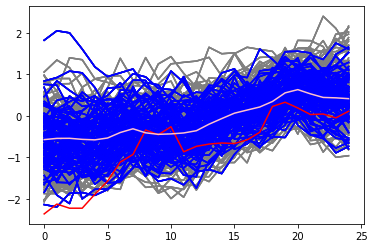

In [16]:
for i in range(cand_x.shape[0]):
    plt.plot(cand_x[i,:,0], color = 'gray')
    
for i in range(accepted_x.shape[0]):
    plt.plot(accepted_x[i,:,0], color = 'blue')

plt.plot(xtrue, color = 'red')
plt.plot(average_x, color = 'pink')

In [17]:
def gen_y(x):
    T = np.shape(x)[0]
    d = np.shape(x)[1]
    
    y=np.zeros((T, d))
    y[0]=beta*np.exp(xtrue[0,0]/2)*np.random.randn(d);
    for t in np.arange(1,T):
        y[t]=beta*np.exp(x[t]/2)*np.random.randn(d)
    return y

def gen_ave_y(x, n=100):
    ys = np.array([gen_y(x) for _ in range(n)])
    return ys
        

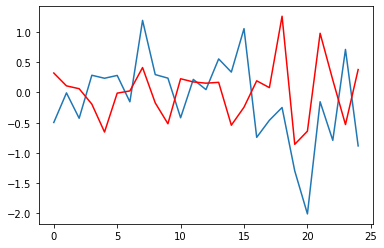

In [18]:
plt.plot(y)
plt.plot(gen_y(xtrue), color='red')

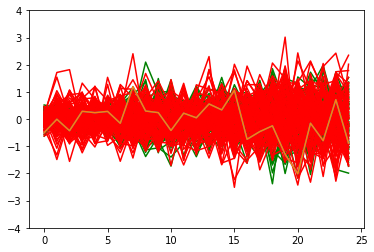

In [19]:

plt.ylim(-4,4)


ys = gen_ave_y(xtrue, 100)
for y_i in ys:
    plt.plot(y_i, color='green')
    
ys = gen_ave_y(average_x, 100)
for y_i in ys:
    plt.plot(y_i, color='red')
plt.plot(y)


plt.plot(y)

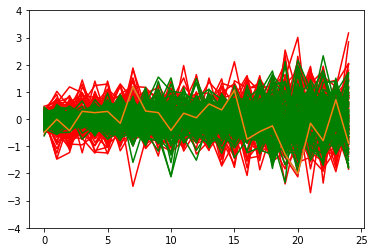

In [21]:

plt.ylim(-4,4)


    
ys = gen_ave_y(average_x, 100)
for y_i in ys:
    plt.plot(y_i, color='red')
plt.plot(y)


ys = gen_ave_y(xtrue, 100)
for y_i in ys:
    plt.plot(y_i, color='green')
    
plt.plot(y)